In [1]:
import pandas as pd
from urllib.request import urlopen
import json

크롤링에 필요한 모듈들을 불러온다.
지난번에 iframe 태그를 가진 데이터를 클롤링할 때 기존에 request모듈과 beautifulsoup모듈로 사용할 때와는 다르게 크롤링해왔듯 이번에도 다른 방법을 써야했다. 왜?
해외증시 일별시세표는 페이지를 넘길때마다 다른 url을 주지 않는다. 이런 경우에 프로그래머는 자바스크립트라는 언어를 이용함. 이 때 사용하는 json이라는 파일 형태인데 이 json 데이터를 찾아 크롤링하기 위해 json모듈을 사용해야함.
### 요약 -> 페이지가 변할 때 url이 변하지 않는다면 json을 사용하자.

In [2]:
symbol = 'NII@NI225'
page = 1

In [3]:
url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=' + symbol + '&fdtc=0&page=' + str(page) 
raw = urlopen(url)
data = json.load(raw)

data[:2]

# json 데이터를 가져오니 dict형식의 데이터인걸 볼 수 있다.

[{'symb': 'NII@NI225',
  'xymd': '20200525',
  'open': 20653.41,
  'high': 20741.65,
  'low': 20584.06,
  'clos': 20741.65,
  'diff': 353.49,
  'rate': 1.73,
  'gvol': 55088200},
 {'symb': 'NII@NI225',
  'xymd': '20200522',
  'open': 20583.95,
  'high': 20615.12,
  'low': 20334.99,
  'clos': 20388.16,
  'diff': -164.15,
  'rate': -0.8,
  'gvol': 71148800}]

In [4]:
data[0]['xymd'] # dict 인덱싱하는 법.

'20200525'

In [5]:
data[0]['clos']

20741.65

In [6]:
d = dict()
for n in range(len(data)): #한페이지에 10개의 다른 날짜와 종가가 있다.
    date = pd.to_datetime(data[n]['xymd']).date()
    # to_datatime으로 연월일분시초 를 갖는 시간형태로 바꿔주고 date()로 년월일만 뽑는다.
    
    price = float(data[n]['clos'])
    #뽑아온 가격을 실수형으로 바꿔준다.
    
    d[date] = price
    #새로운 dict를 만드는 법
    #date는 dict의 key가 되고, price는 value가 되어 dict를 만든다.
d

{datetime.date(2020, 5, 25): 20741.65,
 datetime.date(2020, 5, 22): 20388.16,
 datetime.date(2020, 5, 21): 20552.31,
 datetime.date(2020, 5, 20): 20595.15,
 datetime.date(2020, 5, 19): 20433.45,
 datetime.date(2020, 5, 18): 20133.73,
 datetime.date(2020, 5, 15): 20037.47,
 datetime.date(2020, 5, 14): 19914.78,
 datetime.date(2020, 5, 13): 20267.05,
 datetime.date(2020, 5, 12): 20366.48}

In [7]:
def read_json(d, symbol, page = 1):
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=' + symbol + '&fdtc=0&page=' + str(page) 
    raw = urlopen(url)
    data = json.load(raw)
    
    for n in range(len(data)):
        date = pd.to_datetime(data[n]['xymd']).date()
        price = float(data[n]['clos'])
        d[date] = price
        #여기까지는 위에 만들었던 코드를 함수화 시킨것
        #아래가 추가적인 부분
        
    if len(data) == 10: 
        # 한페이지에 10개의 날짜가 오는데, 만약 그게 10이 아니면 페이지를 더이상 옮기지 않는다.
        # 시차때문인지 가끔 첫페이지에도 10개가 안올때가 있음.
        # 그래서 len(data) == 10 or len(data) == 9로 해줬는데 오류가 나서 안함.
        # 오류가 다른 이유 때문일 수 도 있으나 우선 시간이 너무 지체돼서..
        page += 1
        read_json(d, symbol, page)
        
    return (d) # return값은 날짜를 ket로 종가를 value로 갖는 dict가 된다.

# 저 위에서 d는 이미 빈 dict로 주었다.
# symbol 역시 위에서 NII@NI225 (니케이 225)로 주었다
read_json(d, symbol, page = 1)

{datetime.date(2020, 5, 25): 20741.65,
 datetime.date(2020, 5, 22): 20388.16,
 datetime.date(2020, 5, 21): 20552.31,
 datetime.date(2020, 5, 20): 20595.15,
 datetime.date(2020, 5, 19): 20433.45,
 datetime.date(2020, 5, 18): 20133.73,
 datetime.date(2020, 5, 15): 20037.47,
 datetime.date(2020, 5, 14): 19914.78,
 datetime.date(2020, 5, 13): 20267.05,
 datetime.date(2020, 5, 12): 20366.48,
 datetime.date(2020, 5, 11): 20390.66,
 datetime.date(2020, 5, 8): 20179.09,
 datetime.date(2020, 5, 7): 19674.77,
 datetime.date(2020, 5, 1): 19619.35,
 datetime.date(2020, 4, 30): 20193.69,
 datetime.date(2020, 4, 28): 19771.19,
 datetime.date(2020, 4, 27): 19783.22,
 datetime.date(2020, 4, 24): 19262.0,
 datetime.date(2020, 4, 23): 19429.44,
 datetime.date(2020, 4, 22): 19137.95,
 datetime.date(2020, 4, 21): 19280.78,
 datetime.date(2020, 4, 20): 19669.12,
 datetime.date(2020, 4, 17): 19897.26,
 datetime.date(2020, 4, 16): 19290.2,
 datetime.date(2020, 4, 15): 19550.09,
 datetime.date(2020, 4, 14): 1

In [8]:
# dict가 아닌 Series 타입으로 만들어보기.
historical_index = pd.Series()  
historical_index = read_json(historical_index, symbol, page)

In [9]:
historical_index.head(3)

2020-05-25    20741.65
2020-05-22    20388.16
2020-05-21    20552.31
dtype: float64

In [10]:
# 위에서는 하나의 증시의 종가만 가져왔지만 여러개를 한번에 가져와서 
# 데이터프래임을 만들어보자
indices = {
    'SPI@SPX' : 'S&P 500',
    'NAS@NDX' : 'Nasdaq 100',
    'NII@NI225' : 'Nikkei 225'
}

In [11]:
historical_indices = dict()
#역시 빈 dict를 만들어준다.

for key, value in indices.items(): 
    # 위에서 정의해준 indices에서 key와 value를 따로 꺼낸다.
    # dict에서 key, value랄 따로 꺼낼때는 item함수를 써줘야한다.
    print(key, value) #이건 딱히 필요없을듯 (그냥 잘 가져왔는지 보는정도..?)
    s = dict() 
    s = read_json(s, key, 1)
    # dict s에는 S&P - Nasdaq - Nikei 순으로 날짜는 key로 종가는 value로 들어감.
    
    historical_indices[value] = s
    # 이 상태에서 빈 dict historical_indices에 value를 key로 s를 value로 준다.
    # 즉 dict안에 dict가 생기는 것.


SPI@SPX S&P 500
NAS@NDX Nasdaq 100
NII@NI225 Nikkei 225


In [12]:
historical_indices
# 아래가 dict안에 dict가 생긴 것.
# 아래에서 바깥 dict의 key는 단 세개 (S&P 500, Nasdaq 100, Nikkei 225)
# Key가 S&P 500 일 때 value는 key를 날짜로 value를 종가로 갖는 dict.
# 다른 해외증시에도 동일.

{'S&P 500': {datetime.date(2020, 5, 22): 2955.45,
  datetime.date(2020, 5, 21): 2948.51,
  datetime.date(2020, 5, 20): 2971.61,
  datetime.date(2020, 5, 19): 2922.94,
  datetime.date(2020, 5, 18): 2953.91,
  datetime.date(2020, 5, 15): 2863.7,
  datetime.date(2020, 5, 14): 2852.5,
  datetime.date(2020, 5, 13): 2820.0,
  datetime.date(2020, 5, 12): 2870.12,
  datetime.date(2020, 5, 11): 2930.32,
  datetime.date(2020, 5, 8): 2929.8,
  datetime.date(2020, 5, 7): 2881.19,
  datetime.date(2020, 5, 6): 2848.42,
  datetime.date(2020, 5, 5): 2868.44,
  datetime.date(2020, 5, 4): 2842.74,
  datetime.date(2020, 5, 1): 2830.71,
  datetime.date(2020, 4, 30): 2912.43,
  datetime.date(2020, 4, 29): 2939.51,
  datetime.date(2020, 4, 28): 2863.39,
  datetime.date(2020, 4, 27): 2878.48,
  datetime.date(2020, 4, 24): 2836.74,
  datetime.date(2020, 4, 23): 2797.8,
  datetime.date(2020, 4, 22): 2799.31,
  datetime.date(2020, 4, 21): 2736.56,
  datetime.date(2020, 4, 20): 2823.16,
  datetime.date(2020, 4, 

In [13]:
# 위의 dict안의 dict를 dataframe으로 바꾸면
# 바깥 dict의 key는 column들의 이름이 되고
# 내부 dict의 key들은 공통여부를 떠나서 전부 index?로 가고
# value는 각 column에 맞게 차례로 배치된다.
prices_df = pd.DataFrame(historical_indices) 
prices_df.head(10)

,S&P 500,Nasdaq 100,Nikkei 225
2020-05-22,2955.45,9413.99,20388.16
2020-05-21,2948.51,9377.99,20552.31
2020-05-20,2971.61,9485.02,20595.15
2020-05-19,2922.94,9298.54,20433.45
2020-05-18,2953.91,9331.93,20133.73
2020-05-15,2863.70,9152.64,20037.47
2020-05-14,2852.50,9094.43,19914.78
2020-05-13,2820.00,9000.08,20267.05
2020-05-12,2870.12,9112.45,20366.48
2020-05-11,2930.32,9298.92,20390.66


In [1]:
# d가 빈문자열이 아닐때는 d를 날짜로 바꿔주고, 
# d가 빈문자열일 때는 this_date를 오늘날짜로 한다
# 파라미터로 문자열을 받는다 (d = '')

def date_format(d=''):
    if d != '':
        this_date = pd.to_datetime(d).date()
    else:
        this_date = pd.Timestamp.today().date()
    return(this_date)

아래 index_global 함수의 파라미터
d 자리에는 빈 dict를 파라미터로 쓸 것임
symbol 은 특정해외증시
start_date와 end_date는 아무것도 오지않을때는 빈문자열이
아니면 따로 정의해줘도 됨.
아래 파라미터들을 보면 어떤 수로 특정하게 정의 내린 파라미터들은 마지막에 쓴다.

In [15]:
def index_global(d, symbol, start_date='', end_date='', page = 1):
    
    end_date = date_format(end_date)
    # 크롤링하고자하는 마지막날짜를 위에서 정의 해주준 date_format함수로
    # 날짜형식으로 바꿔준다.
    # 위의 함수에서 설명했듯이 end_date가 빈문자열이라면 자동적으로 오늘 날짜가 된다.
    
    if start_date == '':
        start_date = end_date - pd.DateOffset(months = 1)
    # 그리고 만약 start_date가 빈문자열이라면, 즉, 따로 정의해주지 않았다면
    # end_date에서 한달을 빼서 정의해준다
    # (ex, end_date가 2020.05.11 이라면 start_date는 2020.04.11가 자동으로 된다.)
        
    start_date = date_format(start_date)
    # 정의해주었든 한달전으로 받았든 date_format함수로 날짜형식으로 바꿔준다.
    # date_format에 빈문자열이 들어가면 자동적으로 오늘날짜가 되지만
    # start_date는 정해진든 한달전으로 가든 해서 빈문자열일 일이 없다.
    
    # 여기까지가 start_date 와 end_date를 정의해주는 코딩.
    
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=' + symbol + '&fdtc=0&page=' + str(page) 
    raw = urlopen(url)
    data = json.load(raw)
    # url을 가져와 페이지의 소스를 가져오자.
    
    
    if len(data) > 0:
    # 사실 이 부분이 구지 필요한가 싶은게 어짜피 마지막페이지를 넘어가지 않는이상
    # 각페이지에 데이터가 0개가 될 일이 없다..
    # 아무튼 해당 페이지에 데이터가 존재한다면 정도로 말할 수 있을 듯
    
        for n in range(len(data)):
            date = pd.to_datetime(data[n]['xymd']).date() # 위에서 설명함

            # 페이지의 데이터가 우리가 정해준 start_date와 end_date사이에 있다면
            # (start_date 와 end_date 포함)
            if date >= start_date and date <= end_date:
                price = float(data[n]['clos'])
                #종가를 실수형으로 price에 넣고
                d[date] = price
                # dict d에 날짜 : price 로 key와 value를 만들어준다.
                
            elif date < start_date:
            # 만약 페이지를 넘어가다가 date가 start_date보다 작아진다면
                return (d)
                # d를 받으면서 마무리.
       
        if len(data) == 10: # 이것도 위에서 설명함.
      
            page += 1
            index_global(d, symbol, start_date, end_date, page)
            # 여기서 page는 1씩 올라가기 때문에 page = 1 이 아니라 page로 와야한다.
        
    return (d) # 전페이지를 돌고 dict d를 받는다.

In [41]:
historical_indices = dict() # 우선 dict를 만들고
start_date = '2013-01-01' # start_date를 정의해준다.
end_date = '2019-03-31' # end_date를 정의해준다.
for key, value in indices.items(): # 위에서 설명함 dict 안의 dict를 만드는 과정
    s = dict() 
    s = index_global(s, key, start_date, end_date)
    historical_indices[value] = s

In [45]:
historical_indices

{'S&P 500': {datetime.date(2019, 3, 29): 2834.4,
  datetime.date(2019, 3, 28): 2815.44,
  datetime.date(2019, 3, 27): 2805.37,
  datetime.date(2019, 3, 26): 2818.46,
  datetime.date(2019, 3, 25): 2798.36,
  datetime.date(2019, 3, 22): 2800.71,
  datetime.date(2019, 3, 21): 2854.88,
  datetime.date(2019, 3, 20): 2824.23,
  datetime.date(2019, 3, 19): 2832.57,
  datetime.date(2019, 3, 18): 2832.94,
  datetime.date(2019, 3, 15): 2822.48,
  datetime.date(2019, 3, 14): 2808.48,
  datetime.date(2019, 3, 13): 2810.92,
  datetime.date(2019, 3, 12): 2791.52,
  datetime.date(2019, 3, 11): 2783.3,
  datetime.date(2019, 3, 8): 2743.07,
  datetime.date(2019, 3, 7): 2748.93,
  datetime.date(2019, 3, 6): 2771.45,
  datetime.date(2019, 3, 5): 2789.65,
  datetime.date(2019, 3, 4): 2792.81,
  datetime.date(2019, 3, 1): 2803.69,
  datetime.date(2019, 2, 28): 2784.49,
  datetime.date(2019, 2, 27): 2792.38,
  datetime.date(2019, 2, 26): 2793.9,
  datetime.date(2019, 2, 25): 2796.11,
  datetime.date(2019, 2

In [46]:
prices_df = pd.DataFrame(historical_indices)
prices_df.sort_index(inplace = True)
prices_df = prices_df.fillna(method = 'ffill')

if prices_df.isnull().values.any():
    prices_df = prices_df.fillna(method = 'bfill')

In [47]:
prices_df

,S&P 500,Nasdaq 100,Nikkei 225
2013-01-02,1462.42,2746.47,10688.11
2013-01-03,1459.37,2732.26,10688.11
2013-01-04,1466.47,2724.49,10688.11
2013-01-07,1461.89,2724.22,10599.01
2013-01-08,1457.15,2718.72,10508.06
...,...,...,...
2019-03-25,2798.36,7316.96,20977.11
2019-03-26,2818.46,7351.15,21428.39
2019-03-27,2805.37,7308.19,21378.73
2019-03-28,2815.44,7320.47,21033.76


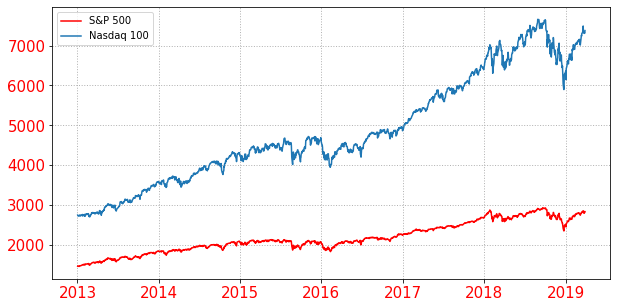

In [56]:
import matplotlib.pyplot as plt
import datetime as dt
plt.figure(figsize = (10, 5))
plt.plot(prices_df['S&P 500'], color = 'r')
plt.plot(prices_df['Nasdaq 100'])
plt.xticks(color = 'r', fontsize = 15)
plt.yticks(color = 'r', fontsize = 15)
plt.legend(['S&P 500', 'Nasdaq 100'])
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)

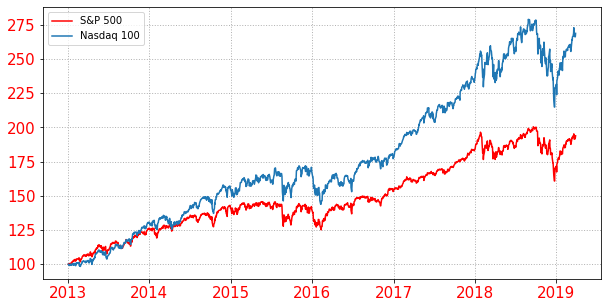

In [55]:
import matplotlib.pyplot as plt
import datetime as dt
plt.figure(figsize = (10, 5))
plt.plot(prices_df['S&P 500'] / prices_df['S&P 500'].loc[dt.date(2013, 1, 2)] * 100, color = 'r')
plt.plot(prices_df['Nasdaq 100'] / prices_df['Nasdaq 100'].loc[dt.date(2013, 1, 2)] * 100)
plt.xticks(color = 'r', fontsize = 15)
plt.yticks(color = 'r', fontsize = 15)
plt.legend(['S&P 500', 'Nasdaq 100'])
plt.grid(True, color = '0.7', linestyle = ':', linewidth = 1)